<a href="https://colab.research.google.com/github/NicholasDow/Folder-of-Fail/blob/main/One_hot_to_cat_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('drive/MyDrive/car-accident-data.csv')

In [3]:
df['Accident year'] = df['Accident year'].astype(str)

In [4]:
df = df.loc[np.repeat(df.index.values, df["Accidents"])]

In [5]:
df = df.drop(columns=['Accidents'])

In [6]:
from sklearn.metrics import accuracy_score

In [7]:
import sklearn

In [8]:
from sklearn.model_selection import train_test_split

In [ ]:
# Getting rid of the unknown 
# print("shape before", df.shape)
# df = df.mask(df.eq('Unknown')).dropna()
# print("shape after", df.shape)

shape before (240091, 8)
shape after (232240, 8)


In [9]:
df

,Accident year,Accident severity,Region,Ons code,Speed limit,Light condition,Weather condition,Road surface
0,2018,Fatal,North East,E12000001,1-20 mph,Daylight,Fine no high winds,Dry
1,2018,Fatal,North East,E12000001,21-30 mph,Daylight,Fine no high winds,Dry
1,2018,Fatal,North East,E12000001,21-30 mph,Daylight,Fine no high winds,Dry
1,2018,Fatal,North East,E12000001,21-30 mph,Daylight,Fine no high winds,Dry
1,2018,Fatal,North East,E12000001,21-30 mph,Daylight,Fine no high winds,Dry
...,...,...,...,...,...,...,...,...
10254,2019,Slight,Scotland,S92000003,Motorway,Darkness - no lighting,Raining no high winds,Wet or damp
10254,2019,Slight,Scotland,S92000003,Motorway,Darkness - no lighting,Raining no high winds,Wet or damp
10255,2019,Slight,Scotland,S92000003,Motorway,Darkness - no lighting,Raining + high winds,Wet or damp
10255,2019,Slight,Scotland,S92000003,Motorway,Darkness - no lighting,Raining + high winds,Wet or damp


In [ ]:
# This didn't work either
#df['Speed limit'] = df['Speed limit'].replace({"1-20 mph": 10, "21-30 mph": 25, "31-40 mph": 35, "41-50 mph": 45, "51-60 mph":55, "61-70 mph": 65, "Motorway": 80})

In [10]:
X = df.drop(columns=['Accident severity'])
y = df['Accident severity']

In [11]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, stratify=y, train_size=0.6, random_state=1)

In [12]:
cats = list(X.columns)

In [13]:
cats

['Accident year',
 'Region',
 'Ons code',
 'Speed limit',
 'Light condition',
 'Weather condition',
 'Road surface']

In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer

In [15]:
transformer_num = make_pipeline(
    StandardScaler(),
)
transformer_cat = make_pipeline(
    OneHotEncoder(handle_unknown='ignore'),
)

preprocessor = make_column_transformer(
    (transformer_cat, cats),
)

In [16]:
from sklearn.utils import resample
X = pd.concat([X_train, y_train], axis=1)
slight = X[X['Accident severity'] == 'Slight']
fatal = X[X['Accident severity'] == 'Fatal']
serious = X[X['Accident severity'] == 'Serious']
n = len(slight)
fatal_upsample = resample(fatal, replace = True, n_samples= n, random_state=0)
serious_upsample = resample(serious, replace= True, n_samples=n, random_state=0)
upsampled = pd.concat([slight, fatal_upsample, serious_upsample])
print(upsampled)
X_train = upsampled.drop(columns=['Accident severity'])
y_train = upsampled['Accident severity']

      Accident year                    Region  ...  Road surface Accident severity
7910           2019  Yorkshire and the Humber  ...           Dry            Slight
7641           2019                North West  ...           Dry            Slight
9982           2019                     Wales  ...   Wet or damp            Slight
9889           2019                     Wales  ...           Dry            Slight
10090          2019                  Scotland  ...  Frost or ice            Slight
...             ...                       ...  ...           ...               ...
7046           2019                South West  ...           Dry           Serious
7181           2019                     Wales  ...   Wet or damp           Serious
6034           2019  Yorkshire and the Humber  ...           Dry           Serious
6877           2019                    London  ...           Dry           Serious
2006           2018                  Scotland  ...           Dry           Serious

[34

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=0)

In [ ]:
# I want to see the cardinality here

In [ ]:
from sklearn.metrics import accuracy_score

# Bundle preprocessing and modeling code in a pipeline, (don't use this anymore)
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])



In [ ]:

my_pipeline.fit(X_train, y_train)

preds = my_pipeline.predict(X_valid)


# Evaluate the model
score = accuracy_score(y_valid, preds)
print('accuracy:', score)
print('f1', sklearn.metrics.f1_score(y_valid, preds, average='micro'))

NameError: ignored

In [ ]:
print('f1', sklearn.metrics.f1_score(y_valid, preds, average='macro'))

f1 0.3157956746566892


In [ ]:
score = accuracy_score(y_valid, preds)
print('accuracy:', score)
print('f1', sklearn.metrics.f1_score(y_valid, preds, average='micro'))

accuracy: 0.4996147358337325
f1 0.4996147358337325


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_valid, preds)

array([[  348,   135,   185],
       [ 2860,  2143,  4351],
       [ 8688,  7809, 21500]])

In [ ]:
np.unique(preds)

array(['Fatal', 'Serious', 'Slight'], dtype=object)

In [ ]:
# OH my god I am retarded, trying isolation forest this time

I don't know if a NN will work but I think it is a good experience to try this method too

In [17]:
from tensorflow.keras import layers
# This basically allows you to modify columns based on their feature
from tensorflow import feature_column
import tensorflow as tf
feature_columns = []

In [18]:
X_train

,Accident year,Region,Ons code,Speed limit,Light condition,Weather condition,Road surface
7910,2019,Yorkshire and the Humber,E12000003,21-30 mph,Daylight,Fine no high winds,Dry
7641,2019,North West,E12000002,21-30 mph,Darkness - lights lit,Fine no high winds,Dry
9982,2019,Wales,W92000004,51-60 mph,Darkness - no lighting,Fine no high winds,Wet or damp
9889,2019,Wales,W92000004,21-30 mph,Darkness - lights lit,Fine no high winds,Dry
10090,2019,Scotland,S92000003,21-30 mph,Darkness - lights lit,Fine no high winds,Frost or ice
...,...,...,...,...,...,...,...
7046,2019,South West,E12000009,41-50 mph,Daylight,Fine no high winds,Dry
7181,2019,Wales,W92000004,51-60 mph,Daylight,Raining no high winds,Wet or damp
6034,2019,Yorkshire and the Humber,E12000003,21-30 mph,Daylight,Unknown,Dry
6877,2019,London,E12000007,21-30 mph,Daylight,Fine no high winds,Dry


In [18]:
# We just apply the pipeline here
X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)
input_shape = [X_train.shape[1]]

In [19]:
model = tf.keras.Sequential([
  layers.Dense(64, activation='relu', input_shape = input_shape),
  layers.Dropout(0.3),
  layers.BatchNormalization(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.3),
  layers.BatchNormalization(),
  layers.Dense(256, activation='relu'),
  layers.Dropout(0.3),
  layers.BatchNormalization(),
  layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



In [20]:
from keras.utils import to_categorical
import keras

In [21]:
from sklearn.preprocessing import LabelEncoder

In [23]:
# Note that you need to remeber what a label encoder is, it really fucked you over to have forgotten it.

to_categorical(LabelEncoder().fit_transform(y_train))

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [22]:
y_train = to_categorical(LabelEncoder().fit_transform(y_train))
y_valid = to_categorical(LabelEncoder().fit_transform(y_valid))
print(y_train[0])


[0. 0. 1.]


In [25]:
# y_train[0][:,1]
# # Oh this an annoy bug, will have to ask if there is a better way later
# y_train= [ i[:,1] for i in y_train ]
# y_valid= [ i[:,1] for i in y_valid ]

In [26]:
# y_train = np.stack(y_train)
# y_valid = np.stack(y_valid)

In [25]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=25,
    min_delta=0.1,
    restore_best_weights=True,
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=1600,
    epochs=200,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)

Epoch 1/200
214/214 [==============================] - 3s 11ms/step - loss: 1.0313 - accuracy: 0.4577 - val_loss: 1.0058 - val_accuracy: 0.5183
Epoch 2/200
214/214 [==============================] - 3s 11ms/step - loss: 1.0214 - accuracy: 0.4662 - val_loss: 1.0073 - val_accuracy: 0.5324
Epoch 3/200
214/214 [==============================] - 3s 11ms/step - loss: 1.0158 - accuracy: 0.4704 - val_loss: 0.9947 - val_accuracy: 0.5014
Epoch 4/200
214/214 [==============================] - 3s 11ms/step - loss: 1.0114 - accuracy: 0.4738 - val_loss: 1.0160 - val_accuracy: 0.4974
Epoch 5/200
214/214 [==============================] - 3s 11ms/step - loss: 1.0076 - accuracy: 0.4757 - val_loss: 1.0076 - val_accuracy: 0.5200
Epoch 6/200
214/214 [==============================] - 3s 12ms/step - loss: 1.0048 - accuracy: 0.4786 - val_loss: 1.0045 - val_accuracy: 0.5167
Epoch 7/200
214/214 [==============================] - 3s 12ms/step - loss: 1.0003 - accuracy: 0.4810 - val_loss: 1.0146 - val_accuracy:

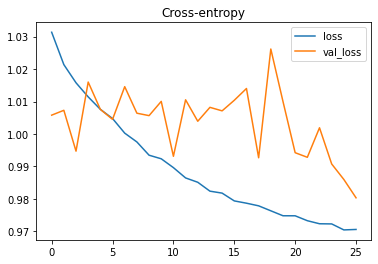

In [26]:
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")



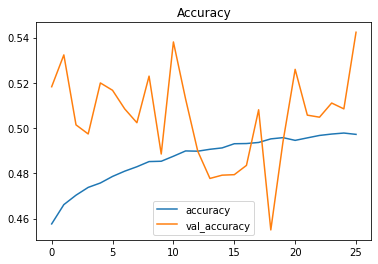

In [27]:
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")


In [ ]:
model(X_valid[:5])

AttributeError: ignored

In [ ]:
y_valid.count()

AttributeError: ignored

In [ ]:
df['Accident severity'].value_counts()

Slight     183368
Serious     45601
Fatal        3271
Name: Accident severity, dtype: int64